<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing import image
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
import numpy as np
import os
import glob
import tensorflow as tf
import time, os, fnmatch, shutil
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [0]:
class Model():
  
  def load_model(self):
    classifier = tf.keras.models.Sequential()
    classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3),
                   activation='relu'))
    classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    classifier.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    classifier.add(tf.keras.layers.Flatten())
    classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
    classifier.add(tf.keras.layers.Dense(units=4, activation='softmax'))  
    return classifier
  
  def train(self):
    model=load_model()
    training_set,test_set=load_data()
    tpu_model = tf.contrib.tpu.keras_to_tpu_model(
        model,
        strategy=tf.contrib.tpu.TPUDistributionStrategy(
            tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
        )
    )
    tpu_model.compile(tf.train.AdamOptimizer(), loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history=tpu_model.fit_generator(training_set, steps_per_epoch=10, epochs=20,
                             validation_data=test_set,
                             validation_steps=5)
    export_model(tpu_model)
  
  def export_model(tpu_model):
    t = time.localtime()
    timestamp = time.strftime('%b-%d_%H%M', t)
    tpu_model.save_weights(timestamp+'.h5')
  
  def load_weights():  
    list_of_files = glob.glob('/content/*') # * means all if need specific format then *.csv
    latest_file = max(list_of_files, key=os.path.getctime)
    classifier=load_model()
    classifier.load_weights("latest_file")
  
  def predict():
    img_path = '/content/train_images/14743.png'
    new_image = test(img_path)

    def test(img_path, show=False):
      load_weights()
      img = image.load_img(img_path, target_size=(64, 64))
      img_tensor = image.img_to_array(img)                    # (height, width, channels)
      img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
      img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

      if show:
          plt.imshow(img_tensor[0])                           
          plt.axis('off')
          plt.show()

      return img_tensor
    print (classifier.predict_classes(new_image,))
  
  
test_final=Model()
test_final.load_model()
test_final.predict()
  

[3]


In [0]:
def load_data():
  train_imagedata = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
          zoom_range=0.2, horizontal_flip=True)
  test_imagedata = ImageDataGenerator(rescale=1. / 255)
  training_set = \
      train_imagedata.flow_from_directory('Samples'
          , target_size=(64, 64), batch_size=32, class_mode='categorical')
  test_set = \
      test_imagedata.flow_from_directory('Samples_old'
          , target_size=(64, 64), batch_size=32, class_mode='categorical')
  return(training_set,test_set)


In [0]:
t,p = load_data()

Found 77 images belonging to 4 classes.
Found 47 images belonging to 4 classes.


In [0]:
t.class_indices

{'DO_New': 0, 'Invoice_New': 1, 'PO_New': 2, 'PaymentVoucher_New': 3}

In [0]:
def load_model():
  classifier = tf.keras.models.Sequential()
  classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3),
                 activation='relu'))
  classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  classifier.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
  classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  classifier.add(tf.keras.layers.Flatten())
  classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
  classifier.add(tf.keras.layers.Dense(units=4, activation='softmax'))  
  return classifier


In [0]:
def train():
  model=load_model()
  training_set,test_set=load_data()
  tpu_model = tf.contrib.tpu.keras_to_tpu_model(
      model,
      strategy=tf.contrib.tpu.TPUDistributionStrategy(
          tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
      )
  )
  tpu_model.compile(tf.train.AdamOptimizer(), loss='categorical_crossentropy',
                     metrics=['accuracy'])
  history=tpu_model.fit_generator(training_set, steps_per_epoch=10, epochs=20,
                           validation_data=test_set,
                           validation_steps=5)
  export_model(tpu_model)

In [0]:
def export_model(tpu_model):
  t = time.localtime()
  timestamp = time.strftime('%b-%d_%H%M', t)
  tpu_model.save_weights(timestamp+'.h5')


In [0]:
def load_weights():  
  list_of_files = glob.glob('/content/*') # * means all if need specific format then *.csv
  latest_file = max(list_of_files, key=os.path.getctime)
  print(latest_file)
  load_model()
  classifier.load_weights("latest_file")

In [0]:
list_of_files = glob.glob('/content/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

/content/Jan-11-2019_0732.h5


In [0]:
list_of_files

['/content/gdrive',
 '/content/Jan-11-2019_0732.h5',
 '/content/Samples_old',
 '/content/Jan-11-2019_0723',
 '/content/Samples',
 '/content/Jan-11-2019_0727.h5',
 '/content/train_images',
 '/content/sample_data']

In [0]:
def predict():
  img_path = '/content/train_images/14743.png'
  new_image = test(img_path)
  
  def test(img_path, show=False):
    load_weights()
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  print (classifier.predict_classes(new_image,))

In [0]:
classes = train_imagedata.class_indices    
print(classes)

AttributeError: ignored

In [0]:
if __name__ == '__main__':
  load_weights()
  prediction()
  

In [0]:
''''
import pandas as pd
df = pd.DataFrame()
df['loss'] = history.history['loss']
df['val_loss'] = history.history['val_loss']
df['acc'] = history.history['acc']
df['val_acc'] = history.history['val_acc']


In [0]:
''''df['epochs'] = range(1,21)


In [0]:
''''df.to_csv('ditium_report.csv')

In [0]:
''''df.index = df.epochs

['acc', 'loss', 'val_acc', 'val_loss']


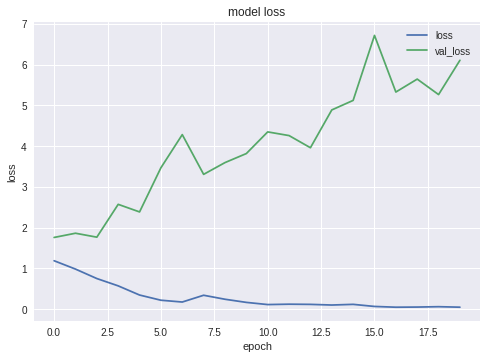

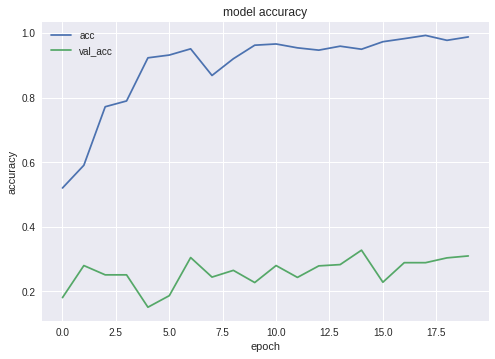

In [0]:
''''import matplotlib.pyplot as plt
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='best')
plt.show()
# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='best')
plt.show()